# Cleaning Data, Creating Testing and Training Data

In [60]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Importing all of the necessary libraries
import numpy as np
import pandas as pd
import math

tm = pd.read_csv('/content/drive/My Drive/MLBA/transfermarkt_fbref_201920.tsv', delimiter='\t')
tm.head()
tm.shape

(2644, 400)

In [62]:
# Dropping categorical variables that will not be used for our analysis
columns_to_drop = ['position2', 'player', 'Column1', 'Season', 'Attendance', 'nationality']
tm = tm.drop(columns = columns_to_drop)

In [63]:
# Now drop any missing values
tm = tm.dropna(how='any')
tm = tm.reset_index(drop=True)
tm

,position,squad,age,birth_year,value,height,foot,league,games,games_starts,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
0,DF,AlavĂ©s,23,1996,4000000,178,right,La Liga,31,23,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
1,"MF,FW",AlavĂ©s,22,1997,4000000,188,right,La Liga,31,14,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
2,MF,AlavĂ©s,25,1994,4000000,183,right,La Liga,17,15,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
3,DF,AlavĂ©s,23,1995,4000000,172,left,La Liga,31,30,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
4,DF,AlavĂ©s,25,1993,1000000,188,right,La Liga,25,24,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,DF,Southampton,29,1989,10000000,179,left,Premier League,32,31,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2213,"MF,FW",Southampton,25,1993,8000000,175,right,Premier League,20,8,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2214,DF,Southampton,20,1998,6000000,190,right,Premier League,6,3,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2215,"MF,DF",Southampton,21,1998,11000000,177,right,Premier League,18,10,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0


In [64]:
# Getting dummy variables for the categorical variables that we will be using in our analysis
dummies = pd.get_dummies(tm[['position', 'squad', 'league', 'foot']])

In [65]:
# Adding the dummies back into the original dataset
tm = pd.concat([tm, dummies], axis = 1)

In [66]:
# Dropping the original columns since we now created dummies
tm = tm.drop(['position', 'squad', 'league', 'foot'], axis = 1)

In [67]:
# Setting x and y
X = tm.drop('value', axis=1)
y = tm['value']

In [68]:
# Creating a training and testing data split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [ ]:
# Taking a look at our new data that we will load into each model
X_train

In [ ]:
#X_train.to_csv('/content/drive/My Drive/MLBA/x_train_data.csv', index=False)

In [ ]:
#y_train.to_csv('/content/drive/My Drive/MLBA/y_train_data.csv', index=False)

In [ ]:
#X_test.to_csv('/content/drive/My Drive/MLBA/x_test_data.csv', index=False)

In [ ]:
#y_test.to_csv('/content/drive/My Drive/MLBA/y_test_data.csv', index=False)

# Creating Visualizations for Descriptive Analytics


In [86]:
# Importing all necessary libraries and datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [87]:
# Creating visualizations based on the original dataset for descriptive analytics
tm = pd.read_csv('/content/drive/My Drive/MLBA/transfermarkt_fbref_201920.tsv', delimiter='\t')

In [88]:
tm.columns

Index(['Column1', 'player', 'nationality', 'position', 'squad', 'age',
       'birth_year', 'value', 'height', 'position2',
       ...
       'Pts/G', 'xG', 'xGA', 'xGDiff', 'xGDiff/90', 'Attendance', 'CL',
       'WinCL', 'CLBestScorer', 'Season'],
      dtype='object', length=400)

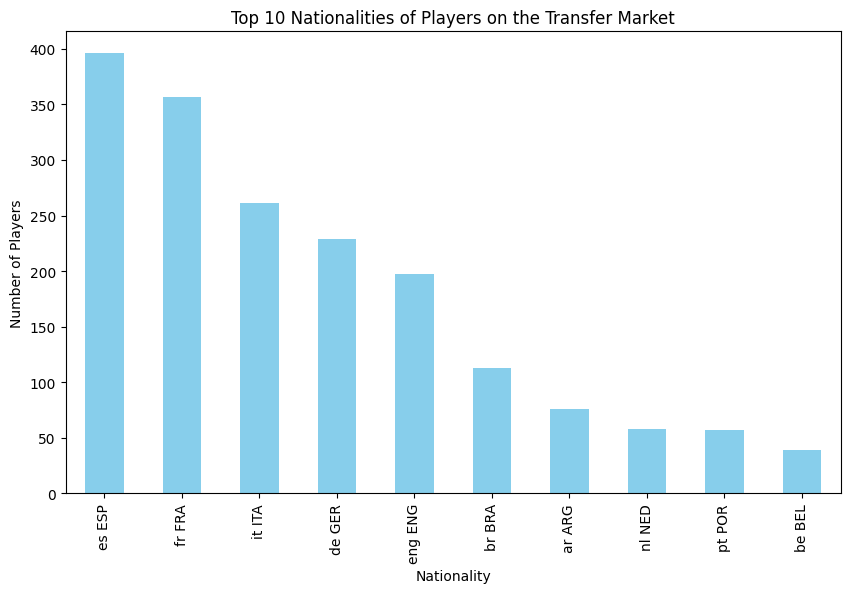

In [89]:
# Getting a visualization of the top 10 most represented nationalities
top_nationalities = tm['nationality'].value_counts().head(10)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
top_nationalities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Nationalities of Players on the Transfer Market')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()

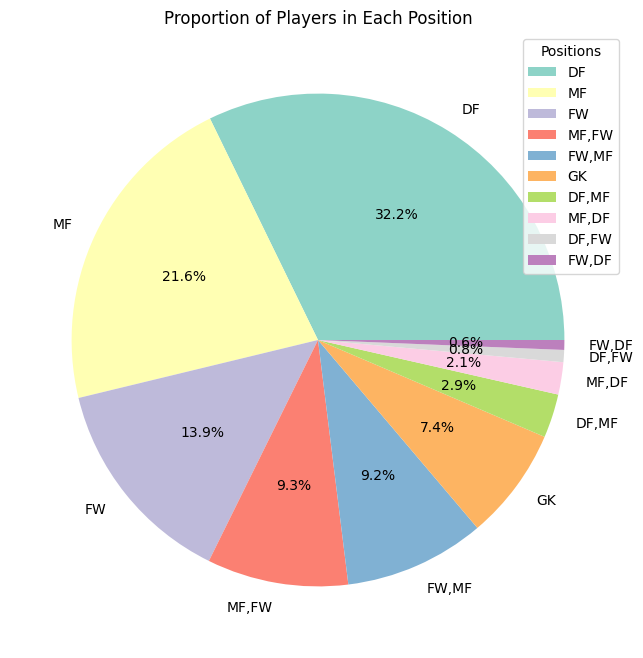

In [90]:
# Creating a pie chart to represent the breakdown of how many players belong to each percentage in our dataset
# First, count the number of players in each position
position_counts = tm['position'].value_counts()

# Plotting the pie chart with customizations
plt.figure(figsize=(12, 8))

# Using a distinct color map
colors = plt.cm.Set3.colors

# Plotting the chart
plt.pie(position_counts, labels=position_counts.index, colors=colors,  autopct='%1.1f%%')
plt.title('Proportion of Players in Each Position')

# Adding a legend
plt.legend(position_counts.index, title='Positions', loc='upper right')


plt.show()

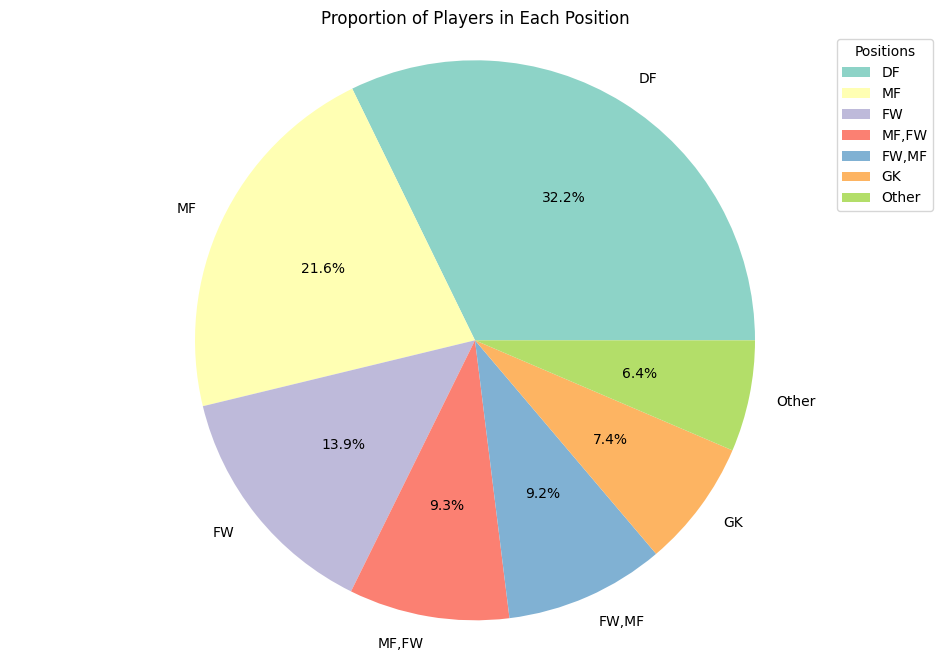

In [91]:
# Attempting to make this look better since there is a bit of crowding
# Identify positions with a proportion less than or equal to 3%
other_positions = position_counts[position_counts / position_counts.sum() <= 0.03]

# Combine small proportions into 'Other' category
position_counts['Other'] = position_counts[other_positions.index].sum()
position_counts.drop(other_positions.index, inplace = True)

# Sort by value so it is easier to read the pie chart
position_counts = position_counts.sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportion of Players in Each Position')

# Add a legend
plt.legend(position_counts.index, title='Positions', loc='upper right')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

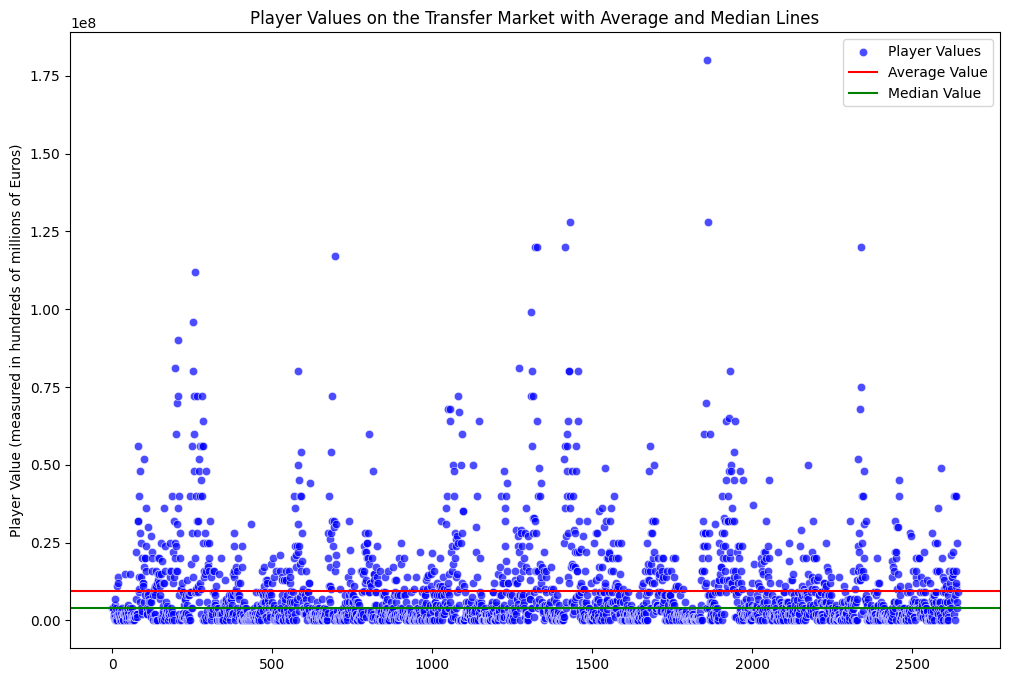

In [92]:
# Creating a scatterplot to visualize the naive model

# Calculate average and median values
average_value = tm['value'].mean()
median_value = tm['value'].median()

# Plotting the scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tm.index, y=tm['value'], alpha=0.7, color='blue', label='Player Values')

# Plotting horizontal lines for average and median values
plt.axhline(average_value, color='red', linestyle='-', label='Average Value')
plt.axhline(median_value, color='green', linestyle='-', label='Median Value')

# Adding labels and title
plt.ylabel('Player Value (measured in hundreds of millions of Euros)')
plt.title('Player Values on the Transfer Market with Average and Median Lines')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [93]:
columns_to_drop = ['position2', 'player', 'Column1', 'Season', 'Attendance']
tm = tm.drop(columns = columns_to_drop)
tm = tm.dropna(how='any')
tm = tm.reset_index(drop=True)

dummies = pd.get_dummies(tm[['position', 'squad', 'league', 'foot', 'nationality']])
tm = pd.concat([tm, dummies], axis = 1)
tm = tm.drop(['position', 'squad', 'league', 'foot', 'nationality'], axis = 1)
X = tm.drop('value', axis=1)
y = tm['value']



# Naive Model

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

In [95]:
# Our Naive Model will take the average value of our outcome, so let's set our outcome to y, and get the average
y = tm['value']
y.mean()

print("The average player on the transfer market is:", y.mean())

The average player on the transfer market is: 9997340.775823185


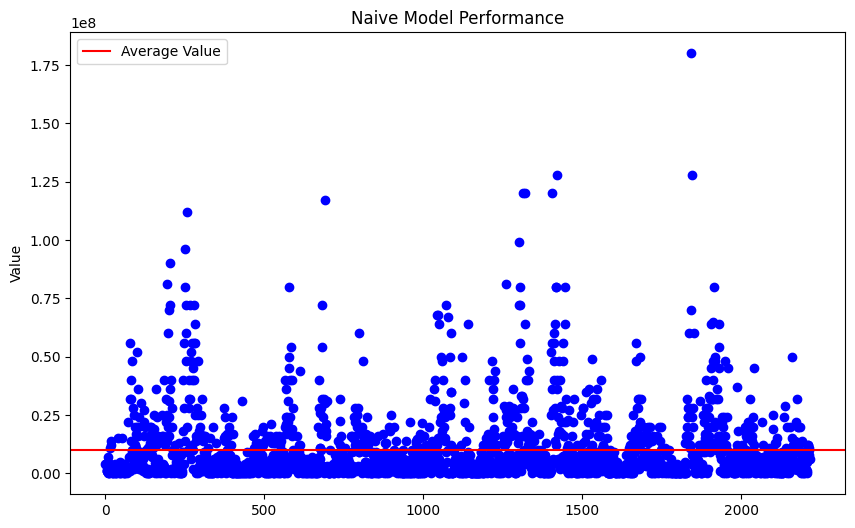

In [96]:
### Creating a scatterplot to visualize the naive model

# Plot the actual values and the naive model predictions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(range(len(y)), y, color='blue')

# Plot the average value as a line
plt.axhline(y=y.mean(), color='red', linestyle='-', label='Average Value')

# Customize the plot
plt.title('Naive Model Performance')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [97]:
### Calculating the RMSE and Accuracy of this naive model
# First, create an array of the average value with the same length as the actual values
y_predicted = np.full_like(y, y.mean())

# Calculate RMSE
rmse_naive = np.sqrt(mean_squared_error(y, y_predicted))

print("Root Mean Squared Error (RMSE):", rmse_naive)

Root Mean Squared Error (RMSE): 15442749.963064304


# Linear Regression

In [98]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train.head()

,age,birth_year,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,squad_Sheffield Utd,squad_Southampton,league_Bundesliga,league_La Liga,league_Ligue 1,league_Premier League,league_Serie A,foot_both,foot_left,foot_right
1660,20,1999,181,5,2,163,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
688,19,2000,177,1,0,26,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1532,23,1996,183,6,4,405,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
315,25,1993,185,36,21,2031,10,3,0,0,...,0,0,0,1,0,0,0,0,0,1
454,26,1993,175,4,0,25,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0


In [99]:
#instantiate model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# fit model
y_train_pred_lm = model_linear.predict(X_train)
y_test_pred_lm = model_linear.predict(X_test)

In [157]:
# calculate MSE
mse_train_lm = mean_squared_error(y_train, y_train_pred_lm)
mse_test_lm = mean_squared_error(y_test, y_test_pred_lm)
print(mse_train_lm, mse_test_lm)

# mse test is very unreadable, so we decided to calculate our error using rMSE instead
rmse_train_lm = np.sqrt(mean_squared_error(y_train, y_train_pred_lm))
rmse_test_lm = np.sqrt(mean_squared_error(y_test, y_test_pred_lm))

419443612605152.5 602082412094687.8


In [158]:
#calucalted rmse
print(rmse_train_lm)
print(rmse_test_lm)

20480322.57082765
24537367.66840909


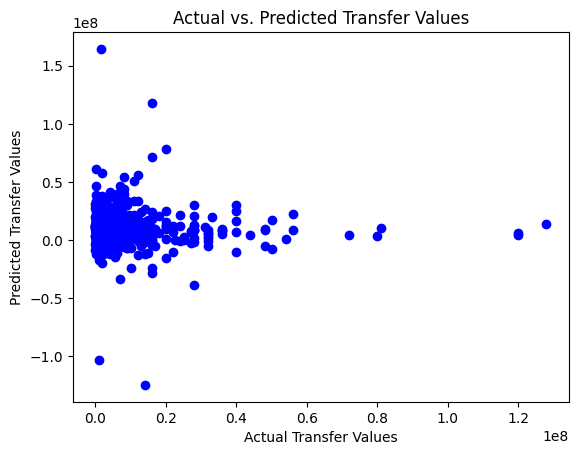

In [159]:
# Scatter plot of actual versus predicted values
plt.scatter(y_test, y_test_pred_lm, color='blue')
plt.title('Actual vs. Predicted Transfer Values')
plt.xlabel('Actual Transfer Values')
plt.ylabel('Predicted Transfer Values')
plt.show()

# Why is Linear rMSE higher than naive rMSE?

A linear model is not complex enouhg to capture our dataset. There are 2 main reasons for this. Firstly, we contend there is not a linear relationship between our predictors and our outcome. Secondly, our dataset has many outliers that cannot be removed, but do not follow a linear assumpation, and thus can affect model performance.

# Lasso and Ridge Regression

In [103]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [110]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Create a Ridge regression model
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error: {mse_test_ridge}')

rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Root Mean Squared Error: {rmse_test_ridge: 0.2f}')

# Coefficients of the model
print('Coefficients:', ridge_model.coef_)


Mean Squared Error: 109266755356740.39
Root Mean Squared Error:  10453073.97
Coefficients: [-7.36786041e+05  8.12073911e+03  1.93534882e+04 -3.63190241e+05
  5.94739290e+04 -1.04869999e+04  3.38393199e+06 -6.33382636e+05
  9.05826066e+05 -2.90522796e+06 -1.41059035e+05 -1.10202968e+06
 -6.54433998e+05  2.24474784e+06  2.15224495e+06 -2.52166734e+06
  2.36126616e+05 -1.11715995e+06  3.23375730e+05  2.37432467e+06
  2.50811395e+06 -3.32752980e+06 -4.58542753e+05  2.01916398e+06
 -2.81680807e+06  1.05507368e+06 -7.79023016e+04 -8.01131306e+04
 -1.19965817e+04  3.03551955e+03  1.12018859e+06 -1.43641741e+06
 -1.88653297e+06  1.24672022e+06 -6.20626490e+06 -4.57914182e+06
  2.30841062e+06  3.88808653e+04 -3.88550547e+04 -1.31959323e+03
 -7.80381932e+02  1.46540573e+03 -3.10318344e+04  2.84221194e+04
  4.08236227e+04 -1.02474313e+05  8.28043676e+04  1.58047403e+04
  6.22706721e+04  2.76510387e+04 -1.62375115e+02 -2.91178585e+05
 -7.93707934e+04  6.81230810e+04  8.32874302e+04  6.15230184e+04

In [111]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Create a Lasso regression model
alpha = 1.0
lasso_model = Lasso(alpha=alpha)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error: {mse_test_lasso}')

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Root Mean Squared Error: {rmse_lasso: 0.2f}')

# Coefficients of the model
print('Coefficients:', lasso_model.coef_)


Mean Squared Error: 144263790704590.1
Root Mean Squared Error:  12010986.25
Coefficients: [-8.21429314e+05  1.02202229e+04 -5.45556387e+03 -4.05328867e+05
  1.33351954e+05  1.02142680e+03  8.25749770e+05 -2.83285642e+06
 -4.93880388e+05 -2.60574364e+06  1.01638736e+04 -1.30532884e+06
  4.42069145e+06  3.67255724e+07  1.90848593e+06 -9.80200605e+06
  3.15606708e+06  1.72946245e+06  2.49193124e+05  4.18157854e+06
 -1.76275235e+07  2.02014473e+07 -1.67399795e+04  3.98260355e+06
 -1.45527468e+07  7.52296907e+04 -6.88369892e+04 -5.53737684e+04
 -2.38648406e+05  5.11816775e+03 -9.78312310e+04 -3.77210690e+06
 -6.60209695e+06  2.67311350e+06 -1.03054138e+07 -1.55759689e+06
  2.05678359e+06  5.17456696e+03  9.39677869e+03  1.04269609e+05
 -5.48566974e+02  1.55206450e+03 -1.52365627e+04  1.11411192e+04
  3.98136514e+04 -4.19501612e+04  2.92070221e+04 -2.11075889e+04
  8.24989726e+04 -3.62418118e+02 -2.87121477e+03  1.46911050e+06
 -1.09894888e+05  4.84669415e+04  1.22763408e+05  6.37388268e+04


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.266e+16, tolerance: 4.354e+13
  model = cd_fast.enet_coordinate_descent(


In [112]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_r_square = r2_score(y_test, ridge_predictions)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_r_square = r2_score(y_test, lasso_predictions)

print(f'Ridge R^2: {ridge_r_square}')
print(f'Lasso R^2: {lasso_r_square}')

Ridge R^2: 0.4798890177020845
Lasso R^2: 0.31330273651475604


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.266e+16, tolerance: 4.354e+13
  model = cd_fast.enet_coordinate_descent(


In [113]:
num_lambdas = 100
lambdas = np.logspace(2, 5, num_lambdas)

In [114]:
y_train_hat_lasso = np.zeros((y_train.shape[0], num_lambdas))
y_test_hat_lasso = np.zeros((y_test.shape[0], num_lambdas))
coefficients_lasso = np.zeros((X_train.shape[1], num_lambdas))

In [142]:
for i, current_lambda in enumerate(lambdas):
  lasso = Lasso(alpha=current_lambda)
  lasso.fit(X_train, y_train) # instantiate and fit model
  y_train_hat_lasso[:, i] = lasso.predict(X_train) # make predictions on training sets
  y_test_hat_lasso[:, i] = lasso.predict(X_test) # make predictions on testing sets
  coefficients_lasso[:, i] = lasso.coef_  #append predictions and coefficients to correct data structures
  mse_lasso = mean_squared_error(y_test, y_test_hat_lasso[:, i])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.640e+16, tolerance: 4.241e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.646e+16, tolerance: 4.241e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.652e+16, tolerance: 4.241e

In [119]:
mse_train_l = np.zeros(num_lambdas)
mse_test_l = np.zeros(num_lambdas)

for i, current_lambda in enumerate(lambdas):
  mse_train_l[i] = mean_squared_error(y_train, y_train_hat_lasso[:,i])
  mse_test_l[i] = mean_squared_error(y_test, y_test_hat_lasso[:,i])

In [120]:
# Store the tuned_mse
tuned_mse_lasso = mse_test_l.min()

# Store minidx, the index of the lowest mse test within mse_test_l using the index function
minidx = np.argmin(mse_test_l)

[6.04148126e+13 6.04487460e+13 6.04882096e+13 6.05339044e+13
 6.05851013e+13 6.06278630e+13 6.06668140e+13 6.07054151e+13
 6.07480398e+13 6.07936101e+13 6.08466389e+13 6.09086974e+13
 6.09706858e+13 6.10318231e+13 6.10972789e+13 6.11650292e+13
 6.12178985e+13 6.12731185e+13 6.13262274e+13 6.13845862e+13
 6.14423586e+13 6.15048276e+13 6.15758336e+13 6.16547548e+13
 6.17340922e+13 6.18214286e+13 6.19022227e+13 6.19897296e+13
 6.20902127e+13 6.22056849e+13 6.23358363e+13 6.24809909e+13
 6.26280273e+13 6.27636430e+13 6.28977982e+13 6.30419013e+13
 6.32095229e+13 6.33581064e+13 6.35145183e+13 6.36950793e+13
 6.38873659e+13 6.40424546e+13 6.42145328e+13 6.44216578e+13
 6.45374752e+13 6.46540314e+13 6.47651173e+13 6.48457037e+13
 6.49182130e+13 6.49844774e+13 6.50610536e+13 6.51236620e+13
 6.51860837e+13 6.52501634e+13 6.53237105e+13 6.54078868e+13
 6.54958840e+13 6.55869964e+13 6.56841203e+13 6.57924487e+13
 6.59165063e+13 6.60475622e+13 6.61764272e+13 6.63168469e+13
 6.64756175e+13 6.664789

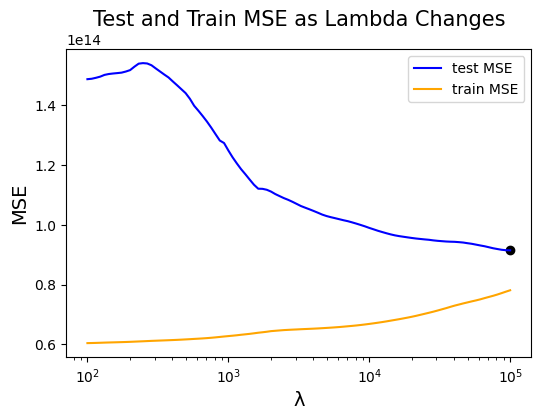

In [121]:
#Plot the graph of MSE as lambdas changes
print(mse_train_l)

plt.figure(figsize=(6, 4))
plt.plot(lambdas, mse_test_l, label = 'test MSE',color = 'blue')
plt.plot(lambdas, mse_train_l, label = 'train MSE',color = 'orange')
plt.scatter(lambdas[minidx], mse_test_l[minidx], color = 'black');
plt.xscale('log')
plt.xlabel('λ', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend()
plt.title("Test and Train MSE as Lambda Changes", fontsize=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.56576e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.55672e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


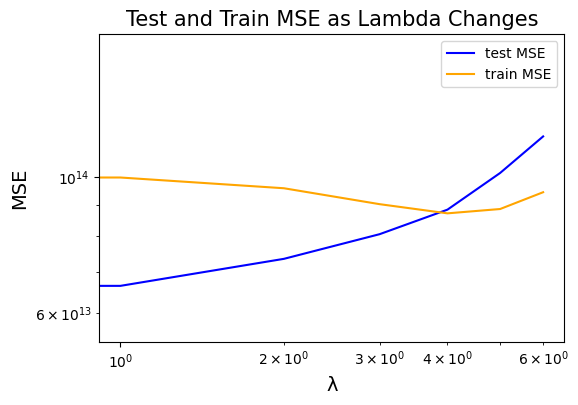

In [143]:
lambda_values = np.logspace(-6, 6, 13)

# Initialize empty lists to store training and testing MSE values
ridge_train_mse_values = []
ridge_test_mse_values = []

# Loop through different lambda values
for alpha in lambda_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Training MSE
    y_train_pred_ridge = ridge_model.predict(X_train)
    train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    ridge_train_mse_values.append(train_mse_ridge)

    # Testing MSE
    y_test_pred_ridge = ridge_model.predict(X_test)
    test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    ridge_test_mse_values.append(test_mse_ridge)



plt.figure(figsize=(6, 4))
plt.plot(np.log10(lambda_values), train_mse_values, label = 'test MSE',color = 'blue')
plt.plot(np.log10(lambda_values), test_mse_values, label = 'train MSE',color = 'orange')
plt.xlabel('λ', fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.title('Test and Train MSE as Lambda Changes',fontsize=15)
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50479e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49725e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


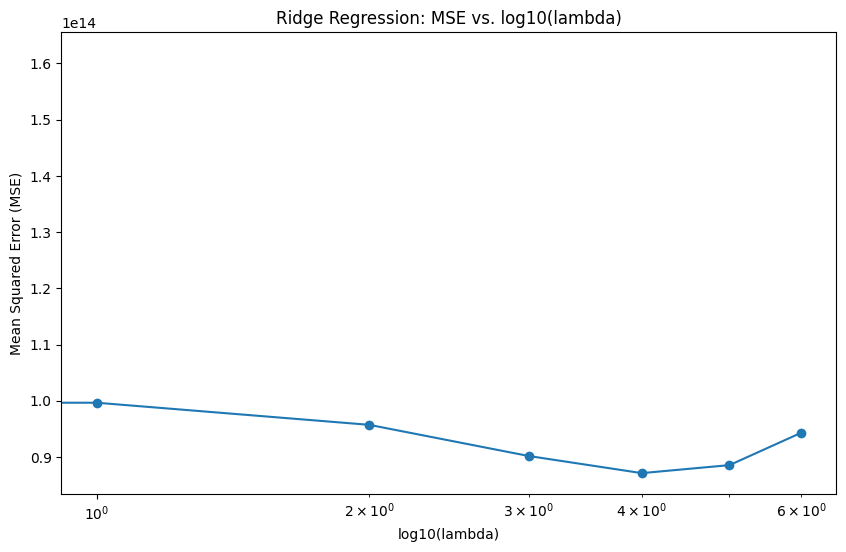

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable


# Set up a range of lambda values (alphas in scikit-learn's Ridge)
lambda_values = np.logspace(-6, 6, 13)

# Initialize empty lists to store MSE values
mse_values = []

# Loop through different lambda values
for alpha in lambda_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_r = ridge_model.predict(X_test)
    mse_r = mean_squared_error(y_test, y_pred_r)
    mse_values.append(mse_r)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambda_values), mse_values, marker='o')
plt.xlabel('log10(lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression: MSE vs. log10(lambda)')
plt.xscale('log')
plt.show()

# kNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

from tqdm import tqdm


In [125]:
scaler = preprocessing.StandardScaler()

# the second line specifies which data to use to compute means and variances
scaler.fit(X_train)
# important: in this step, you should fit the scaler only to training data,
# and not the testing data. We assume testing data is never available to us
# in the training stage

# the third line scales the data using the means and variances computed in the
# previous step
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
results = []
for k in tqdm(range(1, 201, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)

    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

100%|██████████| 200/200 [00:36<00:00,  5.54it/s]


,k,accuracy
0,1,0.090090
1,2,0.081081
2,3,0.078829
3,4,0.074324
4,5,0.063063
...,...,...
195,196,0.099099
196,197,0.099099
197,198,0.105856
198,199,0.108108


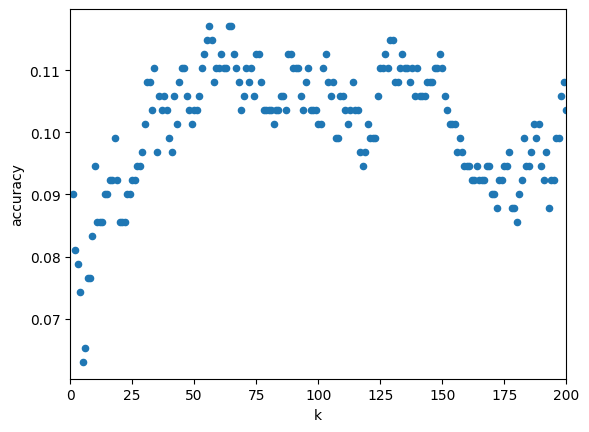

In [127]:
# plot accuracy vs. k
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 200]);

In [128]:
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

Max value = 0.11711711711711711 |  Best k = 56


In [129]:
knn = KNeighborsClassifier(n_neighbors=115)
knn.fit(X_train_scaled, y_train)

pred_y_knn = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, pred_y_knn))
print('Accuracy:', accuracy_score(y_test, pred_y_knn))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.1036036036036036


In [130]:
pred_y_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, pred_y_knn)
print(f'Mean Squared Error: {mse_knn}')

Mean Squared Error: 355733279032100.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [131]:
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_y_knn))
print(f'Root Mean Squared Error (RMSE): {rmse_knn: 0.2f}')

Root Mean Squared Error (RMSE):  18860892.85


# Why is kNN rMSE higher than naive rMSE?


Our rMSE for our kNN model is significantly higher than our naive model. We attribute this to the fact that the kNN model cannot capture the complexity of our data. There are 2 main underlying issues: (1) There may be many irrelevant features to our model even post cleaning that may affect the accuracy of knn, in particualr game statistics that may be relevant to one player but are irrelevant to another . (2) Our features are measured in different scales, namely the game statistics, which many also cause this rMSE to be much higher. (3)A large value of k results in a more generalized model. The KNN algorithm averages over a larger number of neighbors, leading to a smoother decision boundary.

# Decision Tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [150]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1773, 490), (444, 490), (1773, 1), (444, 1))

In [151]:
X_train

,age,birth_year,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,squad_Sheffield Utd,squad_Southampton,league_Bundesliga,league_La Liga,league_Ligue 1,league_Premier League,league_Serie A,foot_both,foot_left,foot_right
0,28,1991,163,37,34,2810,8,6,5,5,...,0,0,0,0,0,0,1,0,0,1
1,23,1996,182,5,2,186,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,23,1996,172,6,6,468,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,25,1994,186,13,8,855,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,28,1991,179,36,26,2267,11,1,4,4,...,0,0,0,1,0,0,0,0,0,1
5,30,1988,183,17,17,1469,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,18,2000,182,3,0,81,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,29,1990,169,16,3,376,0,2,0,0,...,0,0,0,1,0,0,0,0,0,1
8,28,1991,192,6,5,495,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9,30,1989,178,36,31,2717,7,8,5,5,...,0,0,0,1,0,0,0,0,0,1


In [152]:
dt = DecisionTreeRegressor(max_depth=20)
dt.fit(X_train, y_train['value'])

DecisionTreeRegressor(max_depth=20)

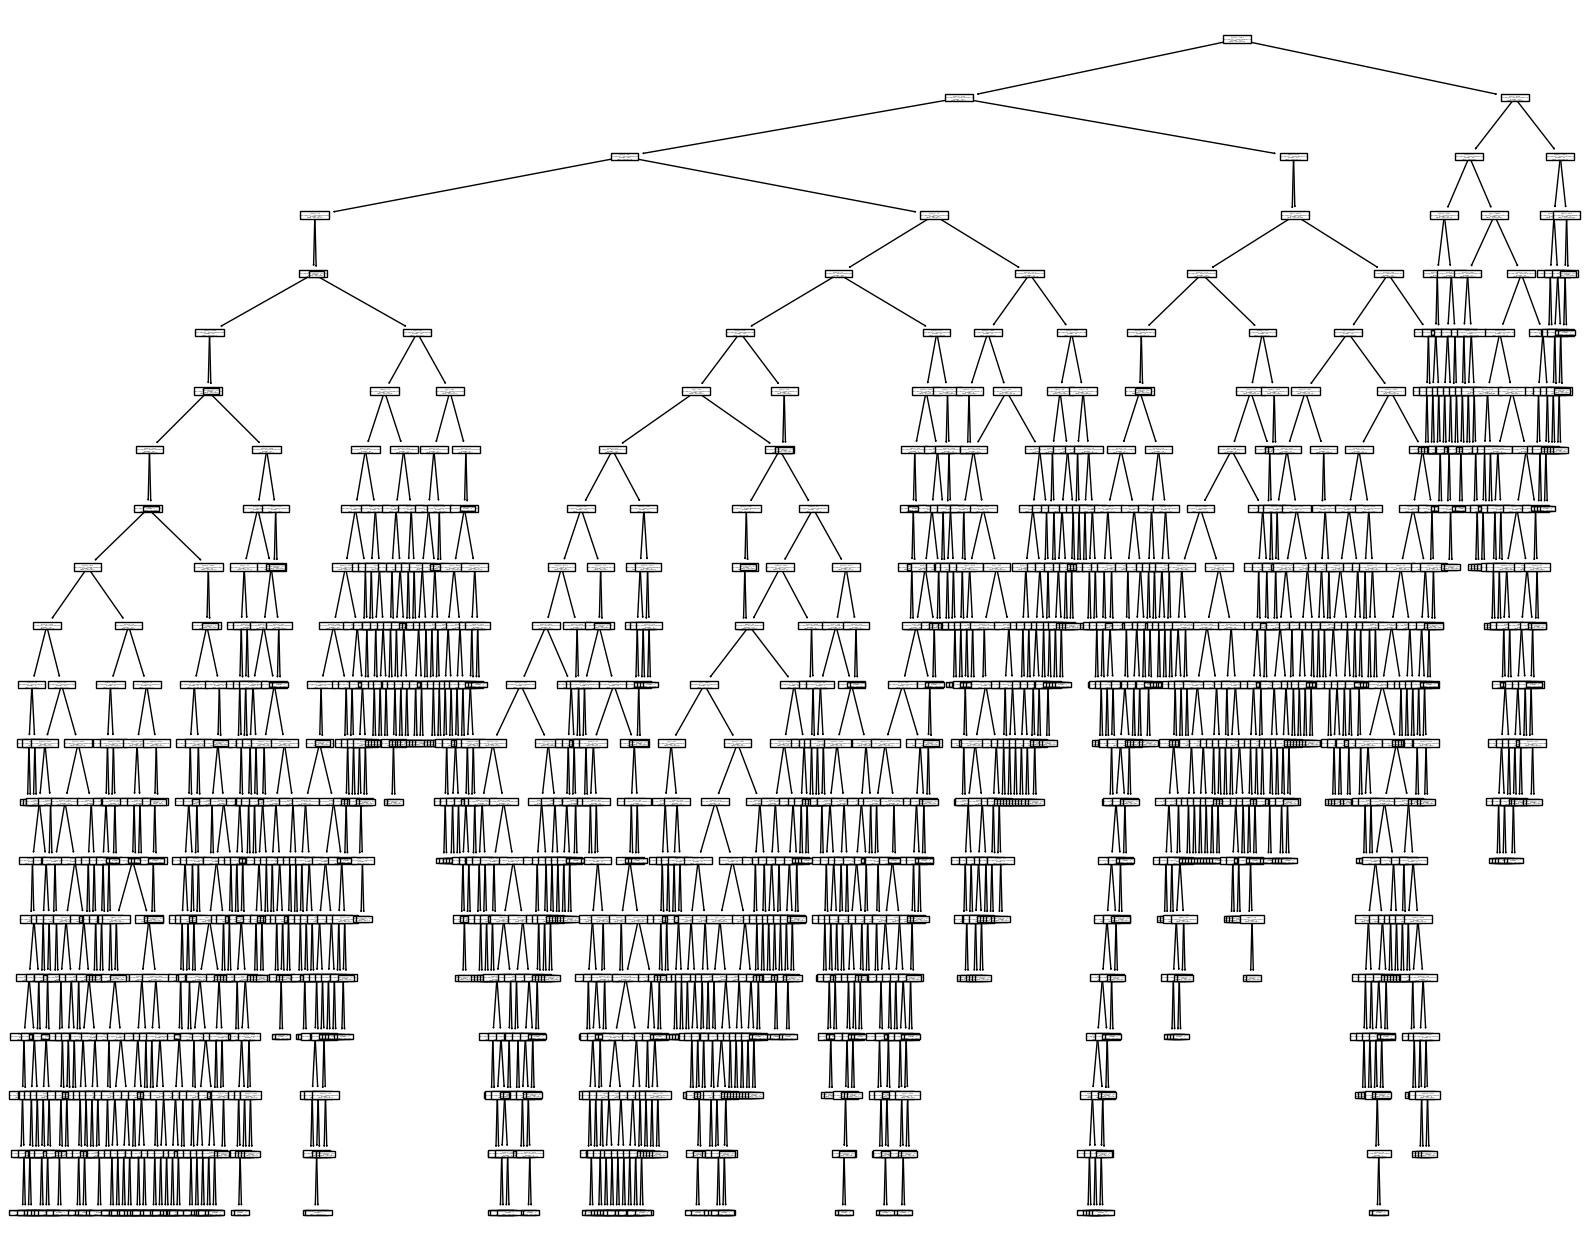

In [153]:
from sklearn import tree
fig_dt = plt.figure(figsize=(20,16))
tree.plot_tree(dt);

In [154]:
from sklearn.metrics import mean_squared_error
y_hat_train_dt = dt.predict(X_train)
mse_train_dt = mean_squared_error(y_train, y_hat_train_dt)
mse_train_dt

96302120501.15796

In [155]:
y_hat_test_dt = dt.predict(X_test)
mse_test_dt = mean_squared_error(y_hat_test_dt, y_test)
mse_test_dt

129844546187844.1

In [156]:
rmse_test_dt = np.sqrt(mse_test_dt)

print(rmse_test_dt)

11394935.111173037


In [139]:
# Get feature importances
feature_importances = dt.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming you have a DataFrame with column names

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print or display the DataFrame
print(feature_importance_df)

                                    Feature    Importance
0                                       age  1.450728e-02
1                                birth_year  3.091971e-02
2                                    height  1.597982e-04
3                                     games  1.231913e-03
4                              games_starts  1.277698e-04
5                                   minutes  5.091736e-02
6                                     goals  0.000000e+00
7                                   assists  0.000000e+00
8                                 pens_made  0.000000e+00
9                                  pens_att  2.106096e-05
10                             cards_yellow  2.027366e-04
11                                cards_red  0.000000e+00
12                              goals_per90  1.415297e-05
13                            assists_per90  6.759726e-05
14                      goals_assists_per90  6.437048e-04
15                         goals_pens_per90  3.866599e-02
16            

In [140]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 3 rows
top3_importances = feature_importance_df.head(3)
print(top3_importances)

             Feature  Importance
132     pass_targets    0.254410
385        xGDiff/90    0.126067
27   shots_on_target    0.060748


# Random Forest

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample
import math

n_estimators = 50

max_features = int(np.sqrt(X_train.shape[1]))


ccp_alpha = 0


trees = []

for b in range(n_estimators):

  random_state = 42 + b


  X_train_sample, y_train_sample = resample(X_train, y_train, random_state=random_state)


  dt = DecisionTreeRegressor(random_state=random_state, max_features=max_features, ccp_alpha=ccp_alpha)

  dt.fit(X_train_sample, y_train_sample)

  trees.append(dt)


print(len(trees))

50


In [161]:

def predict(trees, X):

  y = np.zeros(X.shape[0])


  for tree in trees:
    y += tree.predict(X)

  y = y / len(trees)

  return y

In [163]:

yhat_train_rf = predict(trees, X_train)

mse_train_rf = mean_squared_error(y_train, yhat_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)


yhat_test_rf = predict(trees, X_test)

mse_test_rf = mean_squared_error(y_test, yhat_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print(rmse_train_rf, rmse_test_rf)

3806902.3021594794 9606760.932759766


In [164]:

rmse_train_seq = np.zeros(n_estimators)

rmse_test_seq = np.zeros(n_estimators)


for b in range(n_estimators):

  yhat_train_rf2 = predict(trees[:b + 1], X_train)

  rmse_train_seq[b] = np.sqrt(mean_squared_error(y_train, yhat_train_rf2))

  yhat_test_rf2 = predict(trees[:b + 1], X_test)


  rmse_test_seq[b] = np.sqrt(mean_squared_error(y_test, yhat_test_rf2))

  if b == 49:
    print(rmse_train_seq[b], rmse_test_seq[b])

3806902.3021594794 9606760.932759766


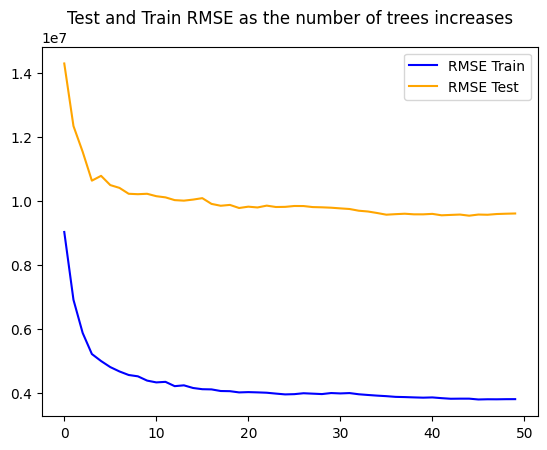

In [165]:
plt.plot(range(n_estimators), rmse_train_seq, label='RMSE Train', c='blue')
plt.plot(range(n_estimators), rmse_test_seq, label='RMSE Test', c='orange')

plt.legend()

plt.title("Test and Train RMSE as the number of trees increases")
plt.show()

In [166]:
random_state = 42
rf = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=random_state)

rf.fit(X_train, y_train)

<ipython-input-166-78c249f29f00>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_features=22, n_estimators=50, random_state=42)

In [167]:

yhat_train_rf = rf.predict(X_train)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, yhat_train_rf))


yhat_test_rf = rf.predict(X_test)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, yhat_test_rf))

print(rmse_train_rf, rmse_test_rf)

3837493.7079534573 9753951.469747504


In [168]:

rmse_train_seq_rf = np.zeros(n_estimators)

rmse_test_seq_rf = np.zeros(n_estimators)


for b in range(n_estimators):

  yhat_train_rf = predict(rf.estimators_[:b+1], X_train)


  rmse_train_seq_rf[b] = np.sqrt(mean_squared_error(y_train, yhat_train_rf))

  yhat_test_rf = predict(rf.estimators_[:b+1], X_test)


  rmse_test_seq_rf[b] = np.sqrt(mean_squared_error(y_test, yhat_test_rf))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names,

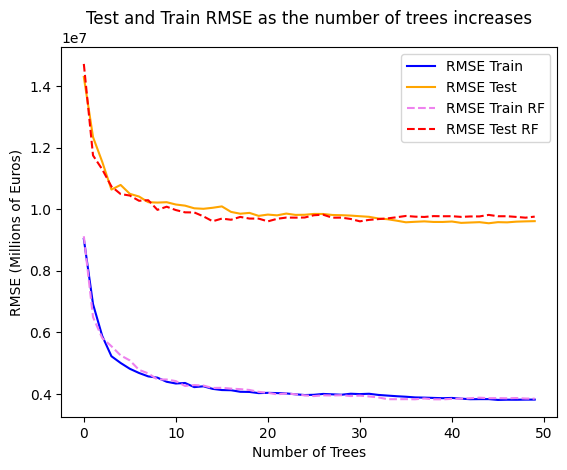

In [169]:
plt.plot(range(n_estimators), rmse_train_seq, label='RMSE Train', c='blue')
plt.plot(range(n_estimators), rmse_test_seq, label='RMSE Test', c='orange')
plt.plot(range(n_estimators), rmse_train_seq_rf, label='RMSE Train RF', c='violet', ls="--")
plt.plot(range(n_estimators), rmse_test_seq_rf, label='RMSE Test RF', c='red', ls="--")

plt.legend()
plt.title("Test and Train RMSE as the number of trees increases")
plt.xlabel("Number of Trees")
plt.ylabel("RMSE (Millions of Euros)")

plt.show()

#Cross Validated Random Forest Model

In [170]:
from sklearn.model_selection import RandomizedSearchCV


rf_cv = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions={"max_features": list(range(1, X_train.shape[1] + 1))},
    scoring="neg_mean_squared_error",
    n_iter=10,  # Adjust the number of iterations based on your computational resources
    random_state=42)


# fit the CV model to training data
rf_cv.fit(X_train, y_train)


# use rf_cv to extract and print the best hyperparameters
print("The tuned hyperparameters are:", rf_cv.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

The tuned hyperparameters are: {'max_features': 429}


In [171]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE for cross-validated RandomForestRegressor
yhat_train_rf_cv = rf_cv.predict(X_train)
mse_train_rf_cv = mean_squared_error(y_train, yhat_train_rf_cv)
rmse_train_rf_cv = np.sqrt(mse_train_rf_cv)

yhat_test_rf_cv = rf_cv.predict(X_test)
mse_test_rf_cv = mean_squared_error(y_test, yhat_test_rf_cv)
rmse_test_rf_cv = np.sqrt(mse_test_rf_cv)

# Compute the percentage change in RMSE test for the CV RandomForest compared to the heuristic model
percentage_change_rmse_test = ((rmse_test_rf_cv - rmse_test_rf) / rmse_test_rf) * 100

print(rmse_train_rf_cv, rmse_test_rf_cv, percentage_change_rmse_test)

3635806.481849782 8933027.105461119 -8.416326109808256


# Boosted Random Forest Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# 'nationality' is the original variable name
nationality_dummies = [col for col in X_train.columns if col.startswith('nationality_')]

# Drop the dummy variables
X_train = X_train.drop(columns=nationality_dummies)

# Drop the dummy variables
X_test = X_test.drop(columns=nationality_dummies)

In [ ]:
reg_boost_params = {
    "n_estimators": [50, 200, 500],
    "learning_rate": [0.01, 0.02, 0.05],
    "base_estimator__max_depth": [20]
}

reg_boost = AdaBoostRegressor(DecisionTreeRegressor())
reg_boost_cv = GridSearchCV(reg_boost, reg_boost_params, scoring="neg_mean_squared_error")
reg_boost_cv.fit(X_train, y_train)

In [ ]:
best_params = reg_boost_cv.best_params_
best_params

In [ ]:
# Create the final model with the best hyperparameters
final_reg_boost_model = AdaBoostRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    base_estimator=DecisionTreeRegressor(max_depth=best_params['base_estimator__max_depth']),

)

# Train the final model on the entire training set
final_reg_boost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_boost = final_reg_boost_model.predict(X_test)

# Evaluate the final model
mse_boost = mean_squared_error(y_test, y_pred_boost)
print("Mean Squared Error (MSE) on Test Set:", mse_boost)
# Calculate Root Mean Squared Error (RMSE)
rmse_boost = np.sqrt(mse_boot)

# Print the results
print("Mean Squared Error (MSE) on Test Set:", mse_boost)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_boost)

In [ ]:
import matplotlib.pyplot as plt

feature_importances_boosted = final_reg_boost_model.feature_importances_
feature_names_boosted = X_train.columns

# Create a DataFrame or a list to organize feature names and their importances
feature_importance_data_boost = list(zip(feature_names_boosted, feature_importances_boosted))

# Sort features by importance in descending order
feature_importance_data_boost.sort(key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_n = 10
top_feature_importance_data = feature_importance_data_boost[:top_n]

# Extract feature names and importances for the top 10 features
top_feature_names, top_feature_importances = zip(*top_feature_importance_data)

# Dictionary to map original feature names to readable names
feature_name_mapping = {
    'touches_att_3rd': 'Touches by Attackers',
    'LgRk': 'League Rank',
    'pass_targets': 'Pass on Target',
    'Pts': 'Points',
    'xGDiff': 'Expected Goal Diff',
    'passes_received_pctm': 'Passes Received %/Min',
    'npxg_net': 'Non-Penalty Expected Goal',
    'birth_year': 'Birth Year',
    'xGDiff/90': 'Expected Goal Diff /90 Min',
    'goals': 'Goals',
}

top_feature_names_readable = [feature_name_mapping.get(name, name) for name in top_feature_names]


# Plots
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names_readable)), top_feature_importances, align='center', color=plt.cm.viridis(np.linspace(0, 1, len(top_feature_names_readable))))
plt.yticks(range(len(top_feature_names_readable)), top_feature_names_readable)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {top_n} Feature Importances')
plt.show()

In [175]:
path_to_file = '/content/drive/My Drive/MLBA/Final_Notebook.ipynb'
!apt update > /dev/null 2>&1
!apt install texlive-xetex > /dev/null 2>&1

import re, pathlib, shutil
nbpath =  pathlib.PosixPath(path_to_file)
!jupyter nbconvert "{nbpath.as_posix()}" --to pdf --output "{nbpath.stem.replace(" ", "_")}"


^C
[NbConvertApp] WARNING | pattern '/content/drive/My Drive/MLBA/Final_Notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyte